<a href="https://colab.research.google.com/github/Adityasingh3008/CREDIT-CARD-DEFAULT-PREDICTION/blob/main/Individual_Notebook_Credit_Card_Default_Prediction_(Capstone_Project_3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

In [36]:
# Importing all required libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics  
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [37]:
# Mounting google drive to load our dataset
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
# Link the dataset path and read csv file
data = '/content/drive/MyDrive/default of credit card clients.xls'

In [39]:
pip install --upgrade xlrd


In [40]:
 # Use read_excel() function to read the excel file data into a DataFrame object
 dataset = pd.read_excel(data, header=1)

In [41]:
# Loaded excel file
dataset

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [42]:
# Fetch first five rows by using head() method of dataframe
dataset.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [43]:
# Fetch last five rows by using tail() method of dataframe
dataset.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1
29999,30000,50000,1,2,1,46,0,0,0,0,...,36535,32428,15313,2078,1800,1430,1000,1000,1000,1


In [44]:
# Getting information about the datatypes and null values stored at each column by using "info()" method
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [45]:
# Access a group of observations and features by their labels
dataset.loc[0]

ID                                1
LIMIT_BAL                     20000
SEX                               2
EDUCATION                         2
MARRIAGE                          1
AGE                              24
PAY_0                             2
PAY_2                             2
PAY_3                            -1
PAY_4                            -1
PAY_5                            -2
PAY_6                            -2
BILL_AMT1                      3913
BILL_AMT2                      3102
BILL_AMT3                       689
BILL_AMT4                         0
BILL_AMT5                         0
BILL_AMT6                         0
PAY_AMT1                          0
PAY_AMT2                        689
PAY_AMT3                          0
PAY_AMT4                          0
PAY_AMT5                          0
PAY_AMT6                          0
default payment next month        1
Name: 0, dtype: int64

**From Above Dataset Documentation:-** 
* PAY_0**[X6]**:- Repayment status in September  2005
* PAY_0**[X7]**:- Repayment status in August  2005
* PAY_0**[X8]**:- Repayment status in July  2005
* PAY_0**[X9]**:- Repayment status in June  2005
* PAY_0**[X10]**:- Repayment status in May  2005
* PAY_0**[X11]**:- Repayment status in April  2005

**Measurement Scale For The Repayment Status:-**
* -1=Pay duly**[Duly mean properly or at right time]**
*  1=Payment delay for one month 
*  2=Payment delay for two months
*  8=Payment delay for eight months
*  9=Payment delay for nine months and above

# **What does 'default.payment.next.month' mean?**
It is basically the actual data that was collected in the next month - Oct 2005. In the Dataframe 'default.payment.next.month' is our dependent feature [Y] and it shows that if **Y=0** i.e.Client is not a defaulter and if **Y=1** then the client is a **defaulter.**

**NOTE:- Defaulter** is a person who defaults or fails to fulfill an obligation, especially a legal or financial one.


In [46]:
# Get the proportion of customers who had default payment in the next month (Oct.2005)? 
dataset['default payment next month'].value_counts(normalize=True)*100

0    77.88
1    22.12
Name: default payment next month, dtype: float64

* **From above table we can see that there were almost 22% of the defaulters who fail to pay the amount in month October 2005.**

In [47]:
# Sort the repayment status codes of 'PAY_X' features by melting them into 1 column
pay = dataset[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]
pay_melt = pd.melt(pay)
print(pay_melt['value'].value_counts())

 0    95919
-1    34640
-2    24415
 2    18964
 1     3722
 3     1430
 4      453
 7      218
 5      137
 6       74
 8       28
Name: value, dtype: int64


* **We have used pd.melt() function which unpivots a DataFrame from wide format to long format, optionally leaving identifier variables set. This function is useful to message a DataFrame into a format where one or more columns are identifier variables (id_vars), while all other columns, considered measured variables (value_vars), are “unpivoted” to the row axis, leaving just two non-identifier columns, ‘variable’ and ‘value’.**
* **Notice code 0 and 2 are in the PAY_X columns but are not included in the data description. Also by doing the value_counts, it shows 0 is the most frequent observation.**
* **-2 corresponds to being no credit to pay and 0 corresponds to a payment being made on time but not the total amount to clear the balance. (Another way to think about this is that the minimum payment is met.)**

In [48]:
# Change uncoventional column names "PAY_0" to 'PAY_1', 'default.payment.next.month'to 'DEF_PAY_NM'
dataset.rename(columns={'SEX':'GENDER','PAY_0':'PAY_1','default payment next month':'DEF_PAY_NMO'},inplace = True)
dataset.columns

Index(['ID', 'LIMIT_BAL', 'GENDER', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'DEF_PAY_NMO'],
      dtype='object')

# **Check Null Records**

In [49]:
# Checking Null Values In Our Dataset
dataset.isnull().sum()

ID             0
LIMIT_BAL      0
GENDER         0
EDUCATION      0
MARRIAGE       0
AGE            0
PAY_1          0
PAY_2          0
PAY_3          0
PAY_4          0
PAY_5          0
PAY_6          0
BILL_AMT1      0
BILL_AMT2      0
BILL_AMT3      0
BILL_AMT4      0
BILL_AMT5      0
BILL_AMT6      0
PAY_AMT1       0
PAY_AMT2       0
PAY_AMT3       0
PAY_AMT4       0
PAY_AMT5       0
PAY_AMT6       0
DEF_PAY_NMO    0
dtype: int64

* **We can see that there are no null values in our dataset.**

# **Check Duplicated Values**

In [50]:
# Taking a look at duplicate values
len(dataset[dataset.duplicated()])

0

* **As there were no null values , This dataset also doesn't contain duplicated values at all.**

# **Plot Distribution Of 'LIMIT_BAL' Feature?**

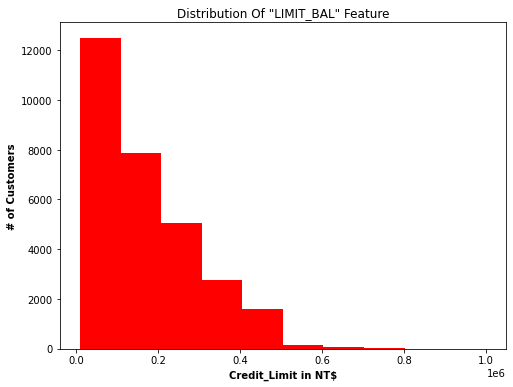

In [51]:
# Use histogram to view the distribution of 'LIMIT_BAL' feature
plt.figure(figsize=(8,6))
plt.hist(dataset["LIMIT_BAL"],color='red')
plt.xlabel('Credit_Limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.title('Distribution Of "LIMIT_BAL" Feature')
plt.show()

**Conclusion Drawn:-**
* **From the above hist plot we can see that there are more number of customers in the range of 0.1 to 1.1 i.e. More than 12000 customers in this particular range.**
* **We can also say that this distribution is a positively skewed distribution i.e. mean != median.**

# **Boxplot For 'LIMIT_BAL' Feature To Detect Outliers?**

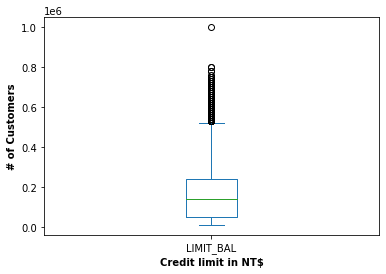

In [52]:
# Use boxplot to identify any outlier in "LIMIT_BAL" feature
dataset['LIMIT_BAL'].plot(kind='box')
plt.xlabel('Credit limit in NT$', fontweight='bold')
plt.ylabel('# of Customers', fontweight='bold')
plt.show()

**Conclusion Drawn:-**
  * **Take a close look at the outlier where the observations from other columns indicate that this was just a customer who has an excellent payment history , therefore it should be considered as a valid data.**

In [53]:
# Fetch customers who has excellent payment history with 'LIMIT_BAL' feature
customer = dataset.loc[dataset['LIMIT_BAL']>900000]

In [54]:
customer

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
2197,2198,1000000,2,1,1,47,0,0,0,-1,...,891586,927171,961664,50784,50723,896040,50000,50000,50256,0


* **Above dataframe says that the customer whose ID is '2198' has a excellent payment history and she is not a defaulter.**

# **Check Numerical Features**

In [55]:
# Analyse the data by looking into various columns i.e. max. , min. , mean etc.
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
GENDER,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_1,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


* **We have used describe() method for calculating some statistical data like percentile, mean and std of the numerical values of the Series or DataFrame.**
* **We have also used a transpose method to convert rows into columns and vice versa.**

# **Check Categorical Features**
* **From the dataset we get to see that the 'GENDER' feature is a binary feature i.e. it consist of two values :- MALE = 1, FEMALE = 2 and it looks good. But 'EDUCATION' and 'MARRIAGE' have some undocumented data and we also get to know that the 'EDUCATION' feature has duplicated values in our dataset.**

In [56]:
# Fetch the values of binary feature 'SEX' where Male = 1 and Female = 2
dataset['GENDER'].value_counts()

2    18112
1    11888
Name: GENDER, dtype: int64

* **We can see that there are more number of female customers compared to male customers in our dataset.**

# **Now Take A Look At Another Feature 'EDUCATION' And Its Unique Values**

In [57]:
# EDUCATION:- (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
dataset['EDUCATION'].unique()

array([2, 1, 3, 5, 4, 6, 0])

* **'EDUCATION' feature:- Notice 5 and 6 are both recorded as 'unknown' and there is 0 which is undocumented in our dataset description.**


In [58]:
# Fetch total counts of each EDUCATION level
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

* **Using the value_counts() method we get to know that the majority EDUCATION Level in our dataset is University level customers.**

In [59]:
# Change values 4, 5, 6 and replace it to 0 and define 0 as 'others'
# 1=graduate school, 2=university, 3=high school, 0=others
dataset['EDUCATION'] = dataset['EDUCATION'].replace({4:0,5:0,6:0})
dataset['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
0      468
Name: EDUCATION, dtype: int64

# **Plot Countplot For The Feature 'EDUCATION'?**

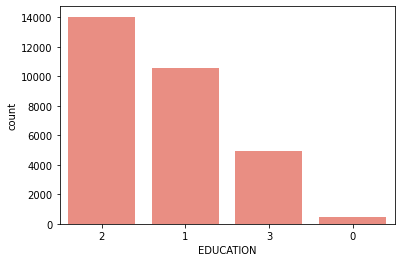

In [60]:
# Countplot for 'EDUCATION' feature 
fig, ax = plt.subplots()
sns.countplot(data=dataset,x='EDUCATION', order = dataset['EDUCATION'].value_counts().index, color='salmon')

**Conclusion Drawn:-**
* **From the above countplot we can say that there are more number of 'university' i.e. [14030 university] customers in our dataset and very least 'others' i.e. [ 468 others] customers.**

# **Now Take A Look At Another Feature 'MARRIAGE' And Its Unique Values?**

In [61]:
# From dataset description:- MARRIAGE:- Marital status (1=married, 2=single, 3=others), but there is also 0

dataset['MARRIAGE'].unique()

array([1, 2, 3, 0])

In [62]:
dataset[dataset['MARRIAGE']==0]

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
218,219,110000,2,3,0,31,0,0,0,0,...,73315,63818,63208,4000,5000,3000,3000,3000,8954,0
809,810,160000,2,2,0,37,0,0,0,0,...,28574,27268,28021,35888,1325,891,1000,1098,426,0
820,821,200000,2,3,0,51,-1,-1,-1,-1,...,780,390,390,0,390,780,0,390,390,0
1019,1020,180000,2,3,0,45,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,0
1443,1444,200000,1,3,0,51,-1,-1,-1,-1,...,2529,1036,4430,5020,9236,2529,0,4430,6398,0
2146,2147,150000,2,3,0,55,-1,-1,-1,-1,...,2939,3396,1870,17498,9160,2939,3396,1870,6800,0
2554,2555,220000,2,1,0,33,-1,-1,-1,-1,...,608,1738,277,1531,942,608,1738,277,492,0
3056,3057,200000,1,3,0,36,-2,-2,-2,-2,...,41359,9140,0,89187,14178,41359,9140,0,0,0
4470,4471,70000,1,3,0,35,2,2,2,2,...,50517,51658,52758,2200,1900,2000,2100,2100,2000,0
5005,5006,90000,2,3,0,24,-2,-2,-2,-1,...,13574,6800,1830,20108,4000,13574,14,5,13162,0


* **'MARRIAGE' column: what does 0 mean in 'MARRIAGE'? Since there are only 0.18% (or 54) observations of 0, we will combine 0 and 3 in one value as 'others'.**

In [63]:
# How many customers had "MARRIAGE" status as 0?

dataset['MARRIAGE'].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.010767
0    0.001800
Name: MARRIAGE, dtype: float64

In [64]:
# Combine 0 and 3 by changing the value 0 with 3
dataset['MARRIAGE'] = dataset['MARRIAGE'].replace({0:3})
dataset['MARRIAGE'].value_counts(normalize=True)

2    0.532133
1    0.455300
3    0.012567
Name: MARRIAGE, dtype: float64

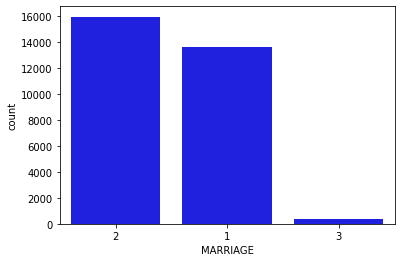

In [65]:
# Countplot for 'MARRIAGE' feature 
fig, ax = plt.subplots()
sns.countplot(data=dataset,x='MARRIAGE', order = dataset['MARRIAGE'].value_counts().index, color='Blue')


**Conclusion Drawn:-**
* **We can easily say that there are more number of single customers [Almost 50% of the 'MARRIAGE' feature is consumed by single customers] compared to married in our dataset.**

# **Trends, Hypothesis and Findings**

In [66]:
# Set ID as dataframe index

dataset.set_index('ID', inplace = True)
dataset.head()

,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEF_PAY_NMO
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [67]:
# Create a new column 'HAS_DEF' to indicate customers who have at least 1 default payment from PAY_1 to Pay_6 where 0 : Not a defaulter and 1 : Has defaulter
HAS_DEF = (dataset['PAY_1'] >1) | (dataset['PAY_2'] >1) | (dataset['PAY_3'] >1) | (dataset['PAY_4'] >1) | (dataset['PAY_5'] >1) | (dataset['PAY_6'] >1)
dataset.loc[HAS_DEF , 'HAS_DEF'] = 1
dataset.loc[dataset.HAS_DEF.isna(), 'HAS_DEF'] = 0
print(HAS_DEF)

ID
1         True
2         True
3        False
4        False
5        False
         ...  
29996    False
29997    False
29998     True
29999    False
30000    False
Length: 30000, dtype: bool


# **Let Us Explore The Dataset Now : EDA(Exploratory Data Analysis)**

# **Q.1 Did Customers With A High Education Level Get Higher Credit Limits?**

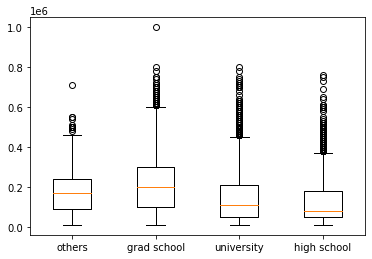

In [68]:
# Use boxplot to visualize credit limit grouped by education level

data1 = []
for i in [0,1,2,3]:
    temp = dataset.loc[dataset.EDUCATION == i, "LIMIT_BAL"]
    data1.append(temp)

fig, ax = plt.subplots()
ax.boxplot(data1)
ax.set_xticklabels(["others","grad school", "university", "high school"])

plt.show()

**Conclusion Drawn:-**
* **From the boxplot, we can see that customers with grad school education have the highest 25% percentile,highest median,highest 75th percentile and highest maximum numbers, which proves that customers with higher education levels did get higher credit limits.**


# **Q.2 Has The Repayment Status Changed In The 6 Month From April 2005 (PAY_6) To September 2005(PAY_0)?**


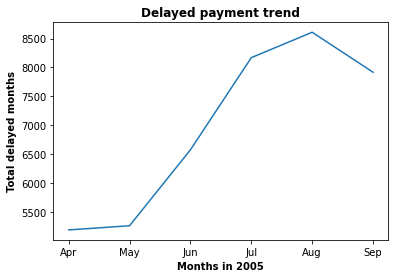

In [69]:
# Subset a dataframe with the records that have default

has_default = dataset[dataset['HAS_DEF']== 1]
#HAS_DEF = dataset['HAS_DEF']== 1
default_trend = has_default[['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1']].sum(axis=0)

# Draw a line chart to show the trend. The lower the number, the shorter delayed payment
fig,ax = plt.subplots()
ax.plot(default_trend)
plt.xticks(['PAY_6','PAY_5','PAY_4','PAY_3','PAY_2','PAY_1'],['Apr','May','Jun','Jul','Aug','Sep'])

plt.xlabel('Months in 2005',fontweight='bold')
plt.ylabel('Total delayed months',fontweight='bold')
plt.title('Delayed payment trend',fontweight='bold')

plt.show()

**Conclusion Drawn:-**
**There was a huge jump from May 2005 (PAY_5) to July 2005 (PAY_3) when delayed payment increased significantly, then it peaked at August 2005 (PAY_2) , After August 2005 (PAY_2) it tends to lost its peakedness in September 2005 (PAY_1).**

# **Q.3 Is There Any Correlation Between Bill Amount And The Delayed Time?**

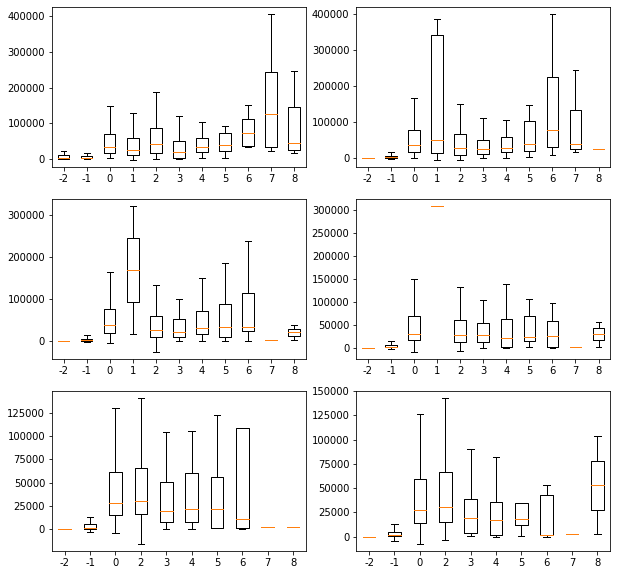

In [70]:
# Make 6 boxplots to visualize bill amounts and the total months of delayed payment

from matplotlib.pyplot import figure

# Make "PAY_1" to"PAY_6" , 'BILL_AMT1" to'BILL_AMT6" into a list respectively
pay_list = [ f"PAY_{i}" for i in range(1, 7) ]
bill_amt_list = [ f"BILL_AMT{i}" for i in range(1, 7) ]

fig, ax = plt.subplots(3,2, figsize=(10, 10))

for pay, bill_amt, myax in zip(pay_list, bill_amt_list, ax.flatten()):
    
    # Prepare data for boxploting
    data1 = []
    for i in sorted(has_default[pay].unique()):
        temp = has_default.loc[has_default[pay] == i, bill_amt]
        data1.append(temp)
        
    # Make boxplot for each PAY variable
    myax.boxplot(data1, showfliers=False,) 
    myax.set_xticklabels(sorted(has_default[pay].unique()))
    
plt.show()

**Conclusion Drawn:-**
* **From the above boxplot we can say that there is not an obvious correlation between bill amount and the total months of delay.**

# **Q.4 Is There Any Correlation Between Credit Limit And The Default Payment Next Month?**

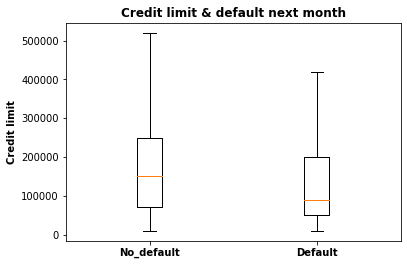

In [71]:
# Make a boxplot to visualize credit limit and default payment next month
# 1: default next month; 0: no default next month

def0 = dataset.loc[dataset['DEF_PAY_NMO'] == 0,'LIMIT_BAL']
def1 = dataset.loc[dataset['DEF_PAY_NMO'] == 1,'LIMIT_BAL']

fig, ax = plt.subplots()
ax.boxplot([def0, def1],  showfliers=False)

ax.set_xticklabels(['No_default',"Default"],fontweight ='bold')
ax.set_ylabel('Credit limit',fontweight ='bold')
ax.set_title('Credit limit & default next month',fontweight ='bold')

plt.show()

**Conclusion Drawn:-**
* **Unsurprisingly, customers who had higher credit limits had lower delayed payment rates.**
* **Customers with high credit limits tend to have higher 'No-Default' rate.**

# **Q.5 Why There Are Negative Bills?**

In [72]:
# Get statistic summary of bill statement columns
bill = dataset[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']]
bill.describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


**Conclusion Drawn:-**
* **The minimum (min) numbers are negative for all 'BILL_AMT X' features.**

In [73]:
# How many bills have negative amount?

bill_melt = pd.melt(bill, var_name = 'bill_cycle',value_name = 'amount')
neg_bill = bill_melt[bill_melt['amount']<0]
neg_bill.groupby('bill_cycle').count()

,amount
bill_cycle,
BILL_AMT1,590
BILL_AMT2,669
BILL_AMT3,655
BILL_AMT4,675
BILL_AMT5,655
BILL_AMT6,688


**Conclusion Drawn:-**
* **There are 3932 bills with negative amounts, each month has 590-688 records.**

# **Mapping the Target**

In [74]:
# For feature 'DEF_PAY_NMO' calculating value counts of defaulters
print(dataset['DEF_PAY_NMO'].value_counts())
print(len(dataset['DEF_PAY_NMO']))

0    23364
1     6636
Name: DEF_PAY_NMO, dtype: int64
30000


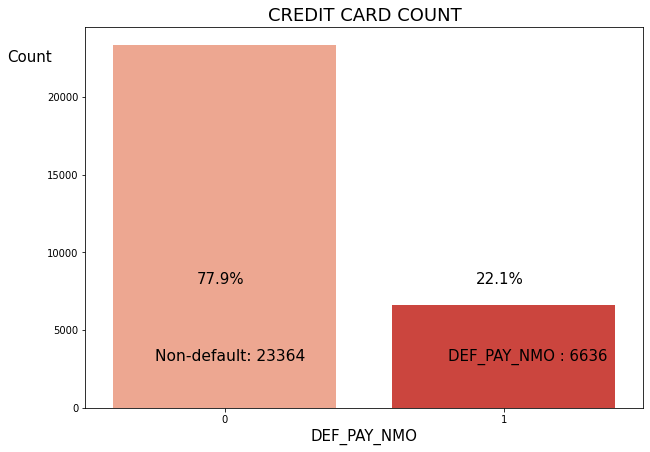

In [75]:
# Frequency of the defaults
default = dataset['DEF_PAY_NMO'].sum() # adds up all the default cases in the df
no_default = len(dataset['DEF_PAY_NMO']) - default  # entire dataset - default cases

# Percentage of the defaults
default_perc = round(default/len(dataset['DEF_PAY_NMO']) * 100, 1)
no_default_perc = round(no_default/len(dataset['DEF_PAY_NMO']) * 100, 1)

# Plotting Target
fig, ax = plt.subplots(figsize=(10,7))  # Set graph size

sns.countplot('DEF_PAY_NMO',data=dataset, palette="Reds")   
plt.annotate('Non-default: {}'.format(no_default), 
             xy=(-0.25, 3000), # xy = (x dist from 0, y dist from 0)
            size=15.5)

plt.annotate('DEF_PAY_NMO : {}'.format(default), 
             xy=(0.8, 3000), # xy = (x dist from 0, y dist from 0)
            size=15)
plt.annotate('{}%'.format(no_default_perc), xy=(-0.1, 8000),size=15)
plt.annotate('{}%'.format(default_perc), xy=(0.9, 8000),size=15)
plt.title('CREDIT CARD COUNT', size=18)
plt.xlabel('DEF_PAY_NMO',size=15)
plt.ylabel('Count', rotation=0, 
           labelpad=40, # Adjusts distance of the title from the graph
           size=15)
ax.yaxis.set_label_coords(-0.1,.9)

**Conclusion Drawn:-**
* **From the above countplot we can see that there are more number of Non-Defaulters compared to Defaulters in our dataset.** 

# **Q.6 Creating Plots Of Each Categorical Variable To Target**

In [76]:
# Creating a new dataframe with just the categorical explanatory variables
dataset_categorical = dataset[['GENDER', 'EDUCATION', 'MARRIAGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','DEF_PAY_NMO']]

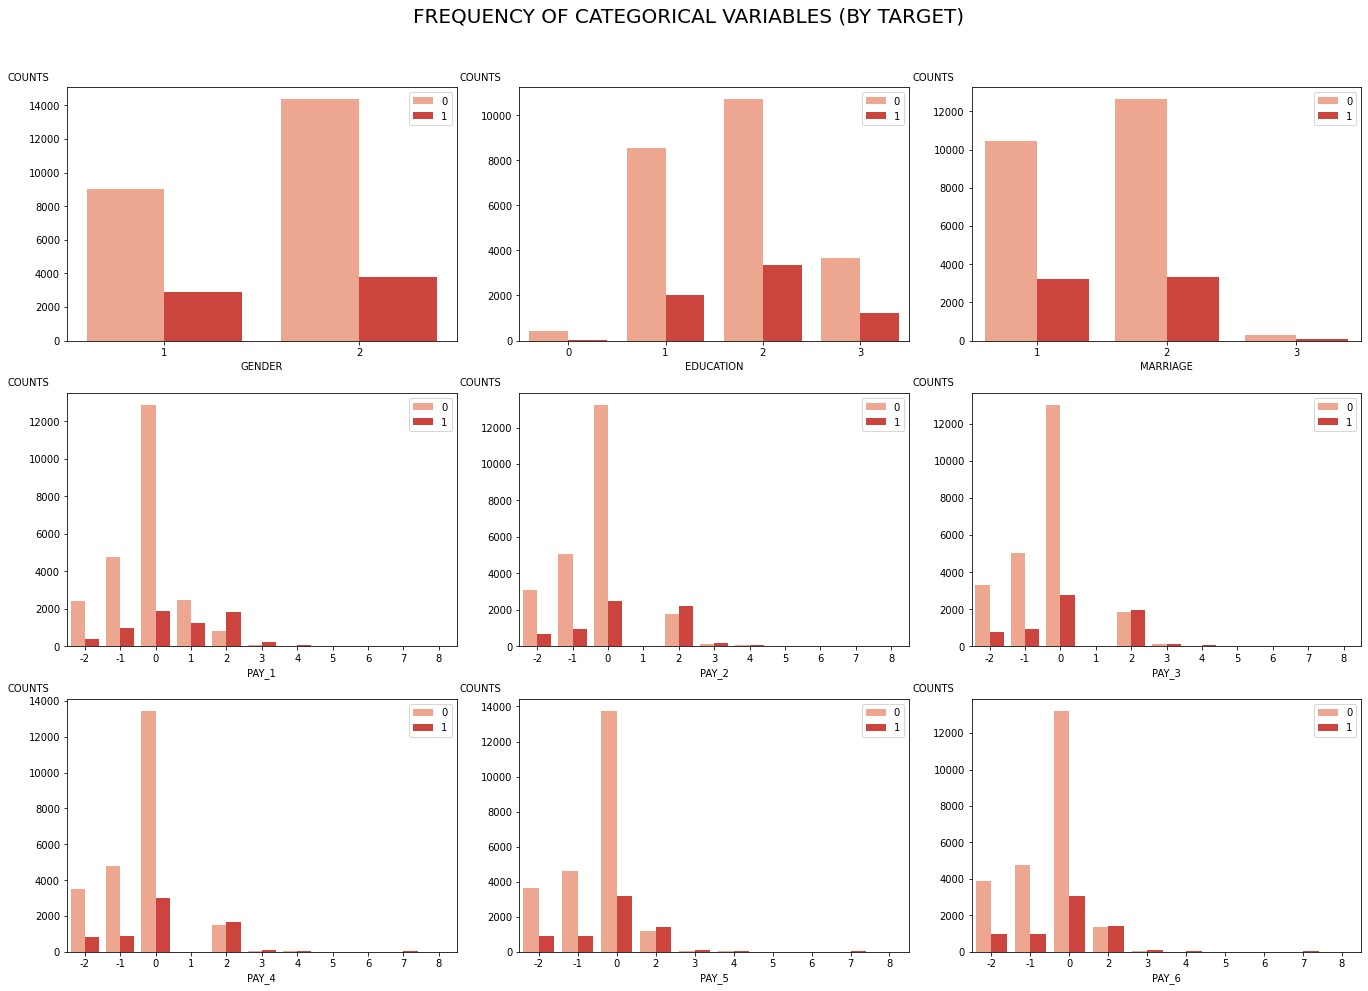

In [77]:
f, axes = plt.subplots(3, 3, figsize=(19,14), facecolor='white')
f.suptitle("FREQUENCY OF CATEGORICAL VARIABLES (BY TARGET)",size=20)

# Creating plots of each categorical variable to target 
ax1 = sns.countplot(x='GENDER', hue = 'DEF_PAY_NMO', data=dataset_categorical, palette='Reds', ax=axes[0,0])
ax2 = sns.countplot(x='EDUCATION',hue = 'DEF_PAY_NMO', data=dataset_categorical, palette='Reds', ax=axes[0,1])
ax3 = sns.countplot(x='MARRIAGE',hue = 'DEF_PAY_NMO', data=dataset_categorical, palette='Reds', ax=axes[0,2])
ax4 = sns.countplot(x='PAY_1', hue = 'DEF_PAY_NMO',data=dataset_categorical, palette='Reds', ax=axes[1,0])
ax5 = sns.countplot(x='PAY_2', hue = 'DEF_PAY_NMO', data=dataset_categorical, palette='Reds', ax=axes[1,1])
ax6 = sns.countplot(x='PAY_3', hue = 'DEF_PAY_NMO', data=dataset_categorical, palette='Reds', ax=axes[1,2])
ax7 = sns.countplot(x='PAY_4', hue = 'DEF_PAY_NMO', data=dataset_categorical, palette='Reds', ax=axes[2,0])
ax8 = sns.countplot(x='PAY_5', hue = 'DEF_PAY_NMO', data=dataset_categorical, palette='Reds', ax=axes[2,1])
ax9 = sns.countplot(x='PAY_6', hue = 'DEF_PAY_NMO', data=dataset_categorical, palette='Reds', ax=axes[2,2])

# Setting legends to upper right
ax1.legend(loc="upper right")
ax2.legend(loc="upper right")
ax3.legend(loc="upper right")
ax4.legend(loc="upper right")
ax5.legend(loc="upper right")
ax6.legend(loc="upper right")
ax7.legend(loc="upper right")
ax8.legend(loc="upper right")
ax9.legend(loc="upper right")

# Changing y-labels to horizontal and changing their positions
ax1.set_ylabel('COUNTS', rotation=0, labelpad=40)  # Labelpad adjusts distance of the title from the graph
ax1.yaxis.set_label_coords(-0.1,1.02)              # (x, y)
ax2.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax2.yaxis.set_label_coords(-0.1,1.02)
ax3.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax3.yaxis.set_label_coords(-0.1,1.02)
ax4.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax4.yaxis.set_label_coords(-0.1,1.02)
ax5.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax5.yaxis.set_label_coords(-0.1,1.02)
ax6.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax6.yaxis.set_label_coords(-0.1,1.02)
ax7.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax7.yaxis.set_label_coords(-0.1,1.02)
ax8.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax8.yaxis.set_label_coords(-0.1,1.02)
ax9.set_ylabel('COUNTS', rotation=0, labelpad=40)
ax9.yaxis.set_label_coords(-0.1,1.02)

# Shifting the Super Title higher
f.tight_layout()  # Prevents graphs from overlapping with each other
f.subplots_adjust(top=0.9);

**Conclusion Drawn:-**

**From the above countplot we can conclude for the following features mentioned below:-**
* **For feature 'GENDER' :- There are more females in number and there are also female defaulters as compared to males in our dataset.**
* **For feature 'EDUCATION' :- There are more university customers in number and there are also more defaulters in university as compared to graduate school , high school in our dataset.There are least defaulters in 'other' feature as comapred to all other values in our dataset.**
* **For feature 'MARRIAGE' :- There are more married customers in number and there is almost equal proportion of defaulters between single and married customers in our dataset.**
* **For feature 'PAY_X' :- When the repayment status = 0 there are more number of defaulters as [ it shows 0 is the most frequent observation] in our dataset.**

# **Q.7 Countplot For The Numerical Feature 'AGE'?**

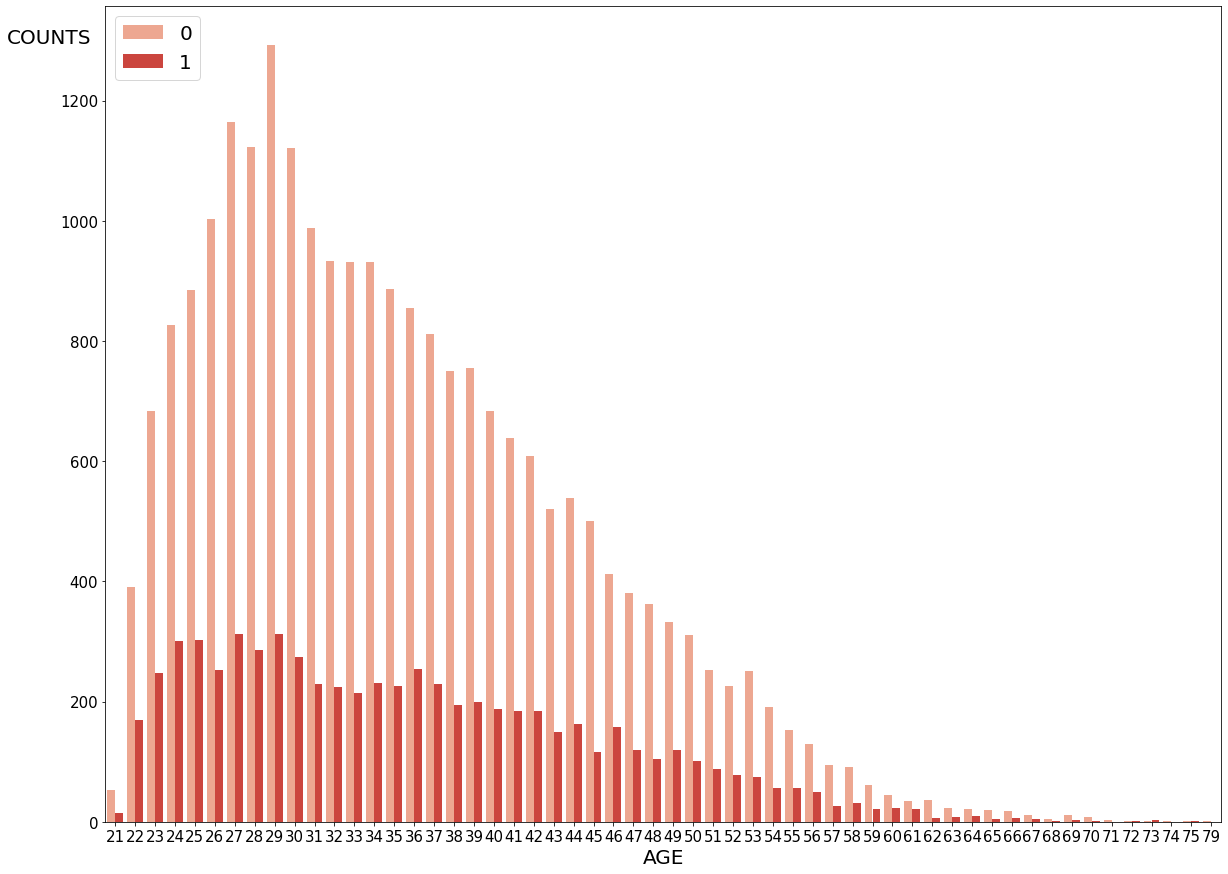

In [78]:
# Countplot For numerical feature 'AGE'
fig, axz = plt.subplots(figsize=(20,15))

axz = sns.countplot(x='AGE', hue= 'DEF_PAY_NMO', data=dataset, palette='Reds')


axz.set_ylabel('COUNTS', rotation=0, labelpad=40,size=20)
axz.set_xlabel('AGE', size=20)
axz.yaxis.set_label_coords(-0.05, 0.95)  # (x, y)
axz.legend(loc=0,fontsize=20);

axz.tick_params(labelsize=15)  # Changes size of the values on the label

 **Conclusion Drawn:-**
 * **From the above countplot we can see that for the AGE = 29 there are more numbers of non-defaulters and there is a equal proportion of defaulters in AGE = 28 and 29.**
 * **For the AGE = 21 and after 55 there are least defaulters in our dataset.**

# **Q.9 Frequency Distribution Of Our Dataset?**

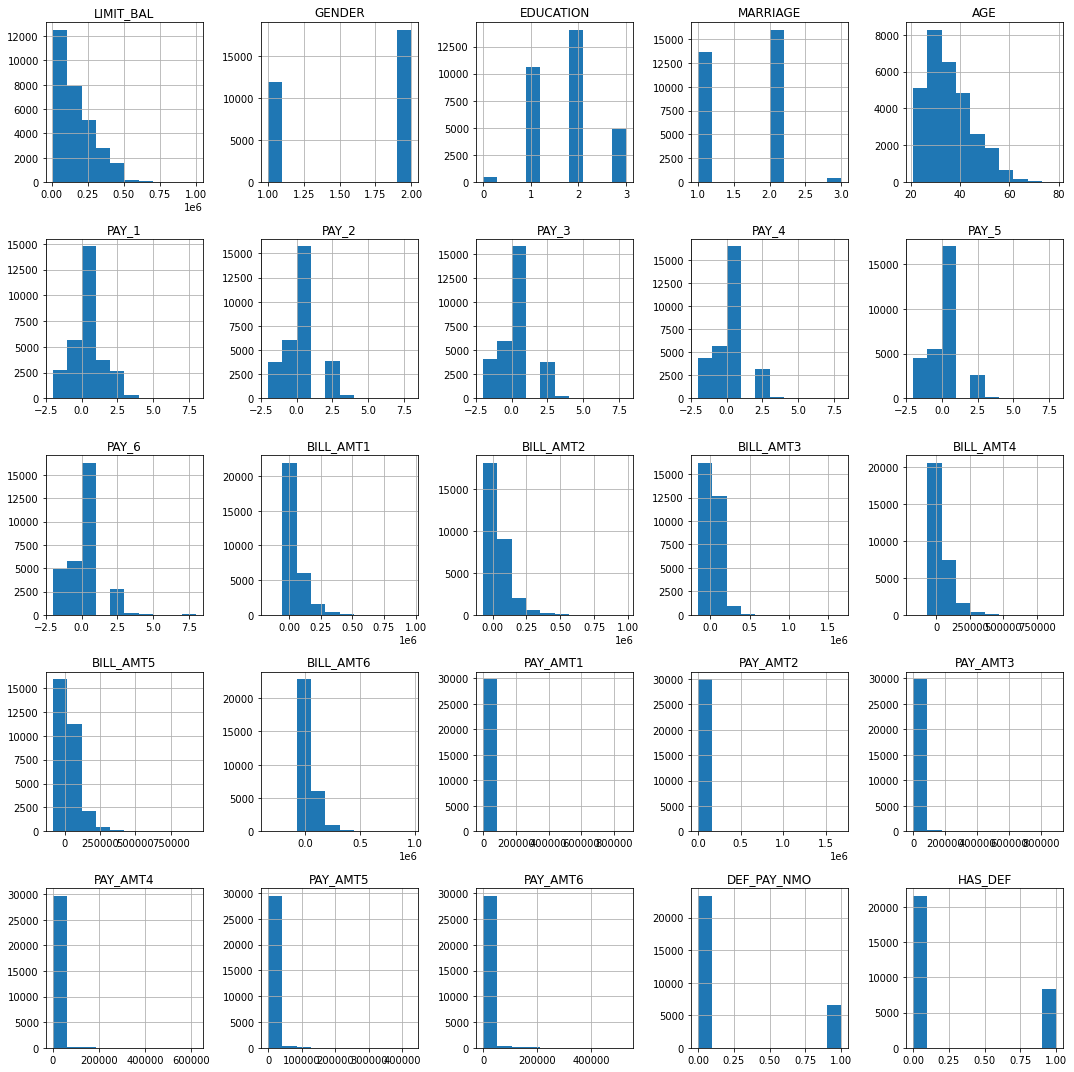

In [79]:
# Freq distribution of all data
fig, ax = plt.subplots(figsize=(15,15))
pd.DataFrame.hist(dataset,ax=ax)
plt.tight_layout();

 **Conclusion Drawn:-**
 * **From the above frequency distribution plot we can see that the 0 is the most frequent observation in our dataset.**
 * **For feature 'LIMIT_BAL' :- We can see that there are more number of customers in the range of 0.1 to 1.1 i.e. More than 12000 customers in this particular range and we can also say that this distribution is a positively skewed distribution i.e. mean != median.**
 * **For feature 'GENDER' :- There are more female customers in number in our dataset.**
 * **For feature 'EDUCATION' :- There are more university customers in number in our dataset.**
 * **For feature 'MARRIAGE' :- There are more married customers in number in our dataset .**
 * **For feature 'PAY_X and PAY_AMT X' :- There is not much difference in there plots for respective features.**
 * **For feature 'DEF_PAY_NMO and HAS_DEF' :- We can say that there are more non-defaulters as compared to defaulters in our dataset.**

# **Q.10 Correlation Between The Variables?**

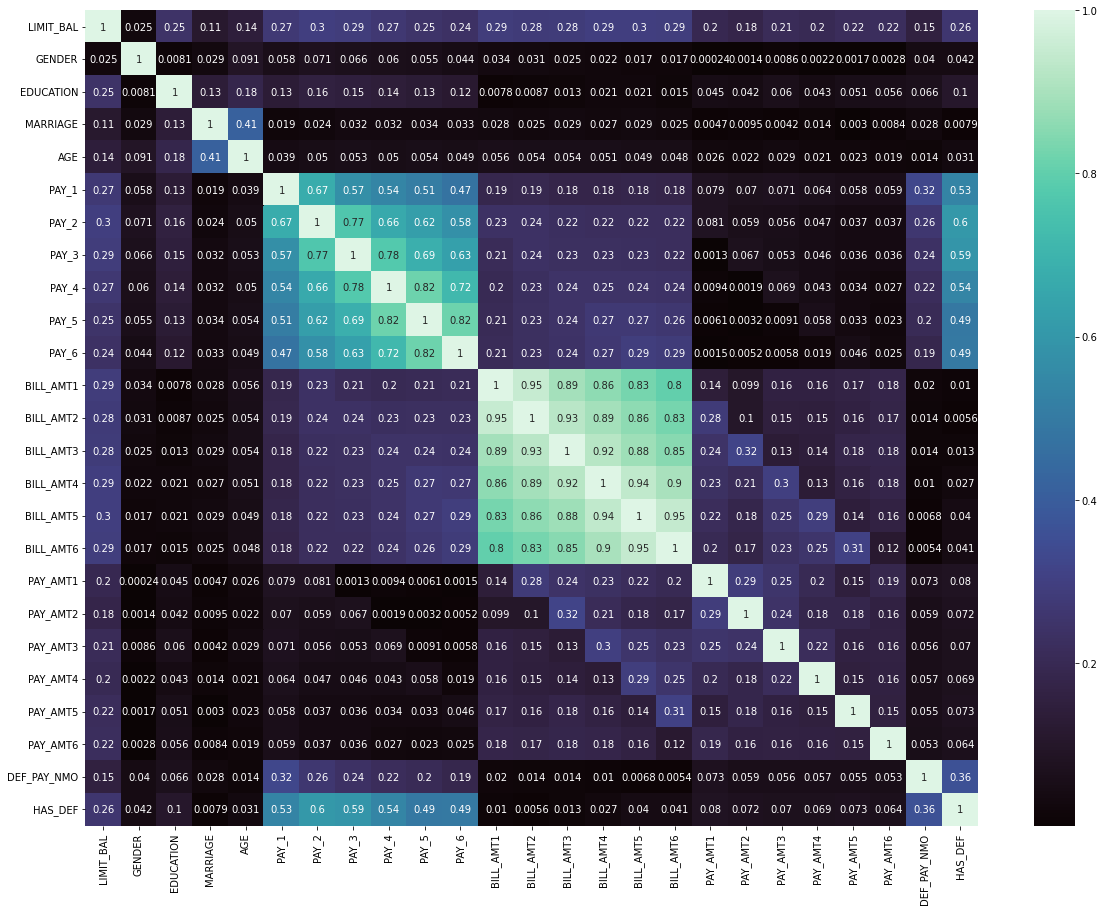

In [80]:
# Find Correlation Between The Variables In Our Dataset
corr = dataset.corr()
plt.figure(figsize = (20,15))
sns.heatmap(abs(corr),annot = True,cmap = 'mako',annot_kws = {'size':10})

**Conclusion Drawn:-**
 * **Each square shows the correlation between the variables on each axis. Values closer to zero means there is no linear trend between the two variables. value close to 1 the correlation is the more positively correlated.The diagonals are all 1 because those squares are correlating each variable to itself (so it's a perfect correlation). For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.**
 * **We can see that the 'PAY_X' feature and 'BILL_AMT-X' feature are highly correlating to each other.**